In [1]:
import torch
from torch import tensor
from torch import nn
import matplotlib.pyplot as plt

## Generating X and Y values, taking values a = 3 and b is noise
Our Job is to find these values when we build our network.

In [5]:
# x_input is equally separated , so using the uniform distribution here.
n = 100
x_input = torch.ones(n,1); #x.size()
_ = x_input.uniform_(0., 1.)

In [6]:
b = torch.rand(n); b[:5], b.shape # added some noise
a = tensor([3.])#, 
y = x_input@a  + b

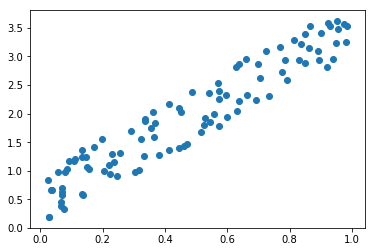

In [7]:
plt.scatter(x_input, y)

In [9]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

###  We initialize with 1 for a and b, calling them a_train and b_train

In [19]:
a_train = tensor([1.])#, 
b_train = tensor([1.])#, # This has a property called requires_grad which is set to false by default.
lr = 1e-1 # take a learning rate.
# Define the model
def model(x_in, a_in, b_in):
  #print(a_in, b_in, x_in[0:5])
  return x_in@a_in + b_in
y_hat = model(x_input, a_train, b_train)
loss = mse(y_hat, y)
loss

tensor(0.6613)

In [20]:
def do_training():
  y_hat = model(x_input, a_train, b_train)
  loss = mse(y_hat, y)
  if i % 20 == 0: print(i, loss, "a_train:", a_train, "b_train:", b_train)
  loss.backward()
  with torch.no_grad():
    a_train.sub_(lr * a_train.grad)
    b_train.sub_(lr * b_train.grad)
    a_train.grad.zero_()
    b_train.grad.zero_()

In [21]:
a_train = tensor([1.], requires_grad=True)#, 
b_train = tensor([1.], requires_grad=True)# Pytorch Autograd mechanism at play here.
lr = .01
for i in range(1000):
  do_training()

0 tensor(0.6613, grad_fn=<MeanBackward0>) a_train: tensor([1.], requires_grad=True) b_train: tensor([1.], requires_grad=True)
20 tensor(0.4670, grad_fn=<MeanBackward0>) a_train: tensor([1.1369], requires_grad=True) b_train: tensor([1.1409], requires_grad=True)
40 tensor(0.3860, grad_fn=<MeanBackward0>) a_train: tensor([1.2387], requires_grad=True) b_train: tensor([1.2165], requires_grad=True)
60 tensor(0.3472, grad_fn=<MeanBackward0>) a_train: tensor([1.3187], requires_grad=True) b_train: tensor([1.2530], requires_grad=True)
80 tensor(0.3243, grad_fn=<MeanBackward0>) a_train: tensor([1.3850], requires_grad=True) b_train: tensor([1.2659], requires_grad=True)
100 tensor(0.3078, grad_fn=<MeanBackward0>) a_train: tensor([1.4425], requires_grad=True) b_train: tensor([1.2650], requires_grad=True)
120 tensor(0.2940, grad_fn=<MeanBackward0>) a_train: tensor([1.4941], requires_grad=True) b_train: tensor([1.2558], requires_grad=True)
140 tensor(0.2817, grad_fn=<MeanBackward0>) a_train: tensor([1

### Print final values for a_train, b_train

In [22]:
print(a_train, b_train)

tensor([2.5897], requires_grad=True) tensor([0.7251], requires_grad=True)


Text(0.5, 1.0, 'Linear relationship')

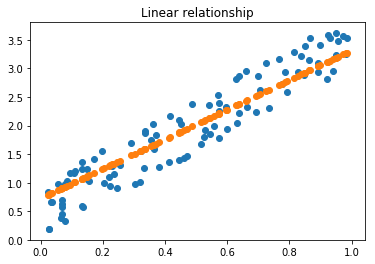

In [24]:
plt.scatter(x_input,y)
plt.scatter(x_input, model(x_input, a_train, b_train).detach().numpy())
plt.title("Linear relationship")